In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import geopandas as gpd
import numpy as np
import plotly.graph_objects as go
import matplotlib.cm as cm
from matplotlib.lines import Line2D



# Cargar el archivo tmin.xlsx que contiene los municipios de cada estación
tmin_path = '../data/tmin.xlsx'
tmin_df = pd.read_excel(tmin_path)

# Cargar el archivo tmean.xlsx en el que queremos agregar la columna 'Municipio'
tmean_path = '../data/tmean.xlsx'
tmean_df = pd.read_excel(tmean_path)

# Realizar el merge para agregar la columna 'Municipio' al archivo tmean.xlsx usando 'CodigoEstacion'
estaciones_df = pd.merge(tmean_df, tmin_df[['CodigoEstacion', 'Municipio']], on='CodigoEstacion', how='left')
estaciones_df = estaciones_df.drop_duplicates()

In [2]:
# Cargar el archivo CSV con los reportes de delitos
csv_path = '../data/delitos.csv'
delitos_df = pd.read_csv(csv_path)

# Filtrar el departamento "Santander" y convertir fechas a formato datetime
santander_delitos_df = delitos_df[delitos_df['DEPARTAMENTO'] == 'SANTANDER']
santander_delitos_df['FECHA HECHO'] = pd.to_datetime(santander_delitos_df['FECHA HECHO'], dayfirst=True, infer_datetime_format=True)


# Agrupar los delitos por mes y municipio
delitos_mes_df = santander_delitos_df.groupby([santander_delitos_df['FECHA HECHO'].dt.to_period('M'), 'MUNICIPIO']).size().reset_index(name='casos')
delitos_mes_df['FECHA HECHO'] = delitos_mes_df['FECHA HECHO'].dt.to_timestamp()

C:\Users\LUISRODRIGUEZ\AppData\Local\Temp\ipykernel_12652\1651751610.py:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  santander_delitos_df['FECHA HECHO'] = pd.to_datetime(santander_delitos_df['FECHA HECHO'], dayfirst=True, infer_datetime_format=True)
C:\Users\LUISRODRIGUEZ\AppData\Local\Temp\ipykernel_12652\1651751610.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  santander_delitos_df['FECHA HECHO'] = pd.to_datetime(santander_delitos_df['FECHA HECHO'], dayfirst=True, infer_datetime_format=True)


In [3]:
estaciones_df

,CodigoEstacion,Latitud,Longitud,Altitud,Fecha,Valor_max,Valor_min,Valor_medio,Municipio
0,23195502,7.121472,-73.184528,1189,2000-01-01,23.965188,17.560887,20.763038,Lebrija
214,23195502,7.121472,-73.184528,1189,2000-02-01,24.037069,17.985632,21.011351,Lebrija
428,23195502,7.121472,-73.184528,1189,2000-03-01,24.156183,18.191250,21.173716,Lebrija
642,23195502,7.121472,-73.184528,1189,2000-04-01,24.881111,18.677917,21.779514,Lebrija
856,23195502,7.121472,-73.184528,1189,2000-05-01,24.751049,18.933286,21.842167,Lebrija
...,...,...,...,...,...,...,...,...,...
1240654,24055030,6.792778,-73.282750,1810,2024-06-01,24.594444,14.843889,19.719167,Zapatoca
1240885,24055030,6.792778,-73.282750,1810,2024-07-01,25.022043,14.602151,19.812097,Zapatoca
1241116,24055030,6.792778,-73.282750,1810,2024-08-01,24.841398,14.027299,19.434348,Zapatoca
1241347,24055030,6.792778,-73.282750,1810,2024-09-01,25.015000,13.905833,19.460417,Zapatoca


In [4]:
delitos_mes_df

,FECHA HECHO,MUNICIPIO,casos
0,2003-01-01,BUCARAMANGA,2
1,2003-02-01,FLORIDABLANCA,1
2,2003-04-01,BARRANCABERMEJA,1
3,2003-07-01,BARRANCABERMEJA,1
4,2003-07-01,LEBRIJA,1
...,...,...,...
2242,2024-09-01,SABANA DE TORRES,5
2243,2024-09-01,SAN GIL,1
2244,2024-09-01,SAN JOSE DE MIRANDA,1
2245,2024-09-01,SOCORRO,2


In [6]:
estaciones_df.rename(columns={'MUNICIPIO': 'Municipio'}, inplace=True)
delitos_mes_df.rename(columns={'FECHA HECHO': 'Fecha'}, inplace=True)
delitos_mes_df.rename(columns={'MUNICIPIO': 'Municipio'}, inplace=True)

# Estandarizar los nombres de municipios en minúsculas en ambos DataFrames
estaciones_df['Municipio'] = estaciones_df['Municipio'].str.lower()
delitos_mes_df['Municipio'] = delitos_mes_df['Municipio'].str.lower()

# Realizar el merge en base a las columnas de fecha y municipio
merged_df = pd.merge(estaciones_df, delitos_mes_df, left_on=['Fecha', 'Municipio'], right_on=['Fecha', 'Municipio'], how='inner')

# Verificar el resultado
print(merged_df.head())

   CodigoEstacion   Latitud   Longitud  Altitud      Fecha  Valor_max  \
0        23195502  7.121472 -73.184528     1189 2003-07-01  25.412097   
1        23195502  7.121472 -73.184528     1189 2004-02-01  26.214943   
2        23195502  7.121472 -73.184528     1189 2008-08-01  25.710618   
3        23195502  7.121472 -73.184528     1189 2009-09-01  27.496806   
4        23195502  7.121472 -73.184528     1189 2012-02-01  26.012356   

   Valor_min  Valor_medio Municipio  casos  
0  18.489382    21.950739   lebrija      1  
1  18.770115    22.492529   lebrija      1  
2  18.020968    21.865793   lebrija      1  
3  18.988611    23.242708   lebrija      1  
4  18.295977    22.154167   lebrija      1  


In [7]:
estaciones_df['Municipio'].unique()

array(['lebrija', 'barrancabermeja', 'albania', 'tona', 'suratá',
       'puerto parra', 'capitanejo', 'el carmen', 'charalá', 'chima',
       'cimitarra', 'pinchote', 'mogotes', 'gámbita', 'puerto wilches',
       'socorro', 'guadalupe', 'landázuri', 'girón', 'palmar', 'cerrito',
       'bucaramanga', 'vélez', 'sabana de torres', 'zapatoca'],
      dtype=object)

In [8]:
municipios_df = delitos_mes_df['Municipio'].str.capitalize().unique()
municipios_df = municipios_df.tolist()
municipios_df

['Bucaramanga',
 'Floridablanca',
 'Barrancabermeja',
 'Lebrija',
 'Socorro',
 'Sabana de torres',
 'San gil',
 'Onzaga',
 'Suaita',
 'Giron',
 'Matanza',
 'El playon',
 'El carmen de chucuri',
 'Zapatoca',
 'Piedecuesta',
 'Chipata',
 'Betulia',
 'Rionegro',
 'Cimitarra',
 'Puerto wilches',
 'Charala',
 'La paz',
 'Barbosa',
 'California',
 'Gambita',
 'San andres',
 'Simacota',
 'Los santos',
 'San vicente de chucuri',
 'Aratoca',
 'Valle de san jose',
 'Pinchote',
 'Barichara',
 'Puerto parra',
 'Florian',
 'Enciso',
 'Confines',
 'Galan',
 'Bolivar',
 'Jesus maria',
 'Villanueva',
 'Ocamonte',
 'San jose de miranda',
 'Surata',
 'Cerrito',
 'El peñon',
 'Oiba',
 'Concepcion',
 'Mogotes',
 'Velez',
 'Landazuri',
 'Aguada',
 'Guadalupe',
 'Encino',
 'Chima',
 'Capitanejo',
 'Santa helena del opon',
 'Malaga',
 'Puente nacional',
 'Vetas',
 'Guavata',
 'Paramo',
 'San miguel',
 'Santa barbara',
 'El guacamayo',
 'Palmas del socorro',
 'Coromoro',
 'Contratacion',
 'Sucre',
 'Guapota',

In [9]:
from geopy.geocoders import Nominatim
import pandas as pd
import time

# Inicializar el geocodificador de OpenStreetMap
geolocator = Nominatim(user_agent="nombre_unico_de_aplicacion")

# Diccionario para guardar resultados
data = {"Municipio": [], "Latitud": [], "Longitud": []}

# Obtener coordenadas
for municipio in municipios_df:
    location = geolocator.geocode(f"{municipio}, Santander, Colombia")
    if location:
        data["Municipio"].append(municipio)
        data["Latitud"].append(location.latitude)
        data["Longitud"].append(location.longitude)
        print(f"{municipio}: ({location.latitude}, {location.longitude})")
    else:
        print(f"No se encontraron coordenadas para {municipio}")
    time.sleep(1)  # Esperar para no sobrecargar la API

# Convertir a DataFrame
df = pd.DataFrame(data)
print(df)

Bucaramanga: (7.16698415, -73.1047294009737)
Floridablanca: (7.0625358, -73.0858228)
Barrancabermeja: (7.0673313, -73.8525627)
Lebrija: (7.1138415, -73.2174056)
Socorro: (6.470518, -73.2623187)
Sabana de torres: (7.3939416, -73.4998859)
San gil: (6.5552856, -73.1312353)
Onzaga: (6.3438974, -72.816606)
Suaita: (6.1257535999999995, -73.36271466241944)
Giron: (7.0732333, -73.1689196)
Matanza: (7.3230808, -73.0155679)
El playon: (7.52300075, -73.19786585908766)
El carmen de chucuri: (6.6986924, -73.5115695)
Zapatoca: (6.8166596, -73.2686529)
Piedecuesta: (6.9874808, -73.0504129)
Chipata: (6.0624774, -73.6372532)
Betulia: (6.9006397, -73.2835591)
Rionegro: (7.4792888, -73.38270064117279)
Cimitarra: (6.3145415, -73.9496809)
Puerto wilches: (7.3480175, -73.8979783)
Charala: (6.2881742, -73.148289)
La paz: (6.1785935, -73.5895841)
Barbosa: (5.9326035, -73.6124368)
California: (7.3480915, -72.9459294)
Gambita: (5.91628015, -73.31589722541469)
San andres: (6.8100668, -72.8506351)
Simacota: (6.68

In [10]:
df

,Municipio,Latitud,Longitud
0,Bucaramanga,7.166984,-73.104729
1,Floridablanca,7.062536,-73.085823
2,Barrancabermeja,7.067331,-73.852563
3,Lebrija,7.113842,-73.217406
4,Socorro,6.470518,-73.262319
...,...,...,...
81,Hato,6.562107,-73.364738
82,San benito,6.103226,-73.530139
83,Carcasi,6.627352,-72.626097
84,Güepsa,6.035726,-73.566324


In [11]:
delitos_mes_df['Municipio'] = delitos_mes_df['Municipio'].str.capitalize()

# Realizar la unión de las tablas por el nombre del municipio
delitos_mes_df = pd.merge(delitos_mes_df, df, on="Municipio", how="left")
delitos_mes_df

,Fecha,Municipio,casos,Latitud,Longitud
0,2003-01-01,Bucaramanga,2,7.166984,-73.104729
1,2003-02-01,Floridablanca,1,7.062536,-73.085823
2,2003-04-01,Barrancabermeja,1,7.067331,-73.852563
3,2003-07-01,Barrancabermeja,1,7.067331,-73.852563
4,2003-07-01,Lebrija,1,7.113842,-73.217406
...,...,...,...,...,...
2242,2024-09-01,Sabana de torres,5,7.393942,-73.499886
2243,2024-09-01,San gil,1,6.555286,-73.131235
2244,2024-09-01,San jose de miranda,1,6.625267,-72.736699
2245,2024-09-01,Socorro,2,6.470518,-73.262319


In [66]:
delitos_mes_df.to_csv('../data/delitos/delitos_santander.csv', index=False)

In [12]:
merged_df1 = delitos_mes_df.groupby(['Municipio','Latitud', 'Longitud'])['casos'].sum().reset_index()
merged_df1['Municipio'] = merged_df1['Municipio'].str.capitalize()
merged_df1

,Municipio,Latitud,Longitud,casos
0,Aguada,6.162366,-73.521569,4
1,Albania,5.758765,-73.915162,3
2,Aratoca,6.694573,-73.018703,16
3,Barbosa,5.932603,-73.612437,45
4,Barichara,6.635716,-73.223442,8
...,...,...,...,...
81,Valle de san jose,6.448015,-73.144301,10
82,Velez,6.135413,-73.834210,52
83,Vetas,7.309264,-72.871808,30
84,Villanueva,6.671239,-73.175398,4


In [61]:
merged_df1.to_csv('../data/delitos/delitos_santander_total.csv', index=False)

In [13]:
top_20_delitos = merged_df1.sort_values(by='casos', ascending=False).head(20)
top_20_delitos

,Municipio,Latitud,Longitud,casos
5,Barrancabermeja,7.067331,-73.852563,647
8,Bucaramanga,7.166984,-73.104729,485
65,Sabana de torres,7.393942,-73.499886,353
18,Cimitarra,6.314541,-73.949681,229
72,San vicente de chucuri,6.928779,-73.520754,166
34,Giron,7.073233,-73.168920,155
64,Rionegro,7.479289,-73.382701,112
31,Floridablanca,7.062536,-73.085823,98
59,Piedecuesta,6.987481,-73.050413,97
46,Lebrija,7.113842,-73.217406,97


In [71]:
top_20_delitos.to_csv('../data/delitos/top20delitos_santander.csv', index=False)

C:\Users\LUISRODRIGUEZ\AppData\Local\Temp\ipykernel_12652\832482856.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', len(unique_municipios))  # Elegir un colormap con suficientes colores


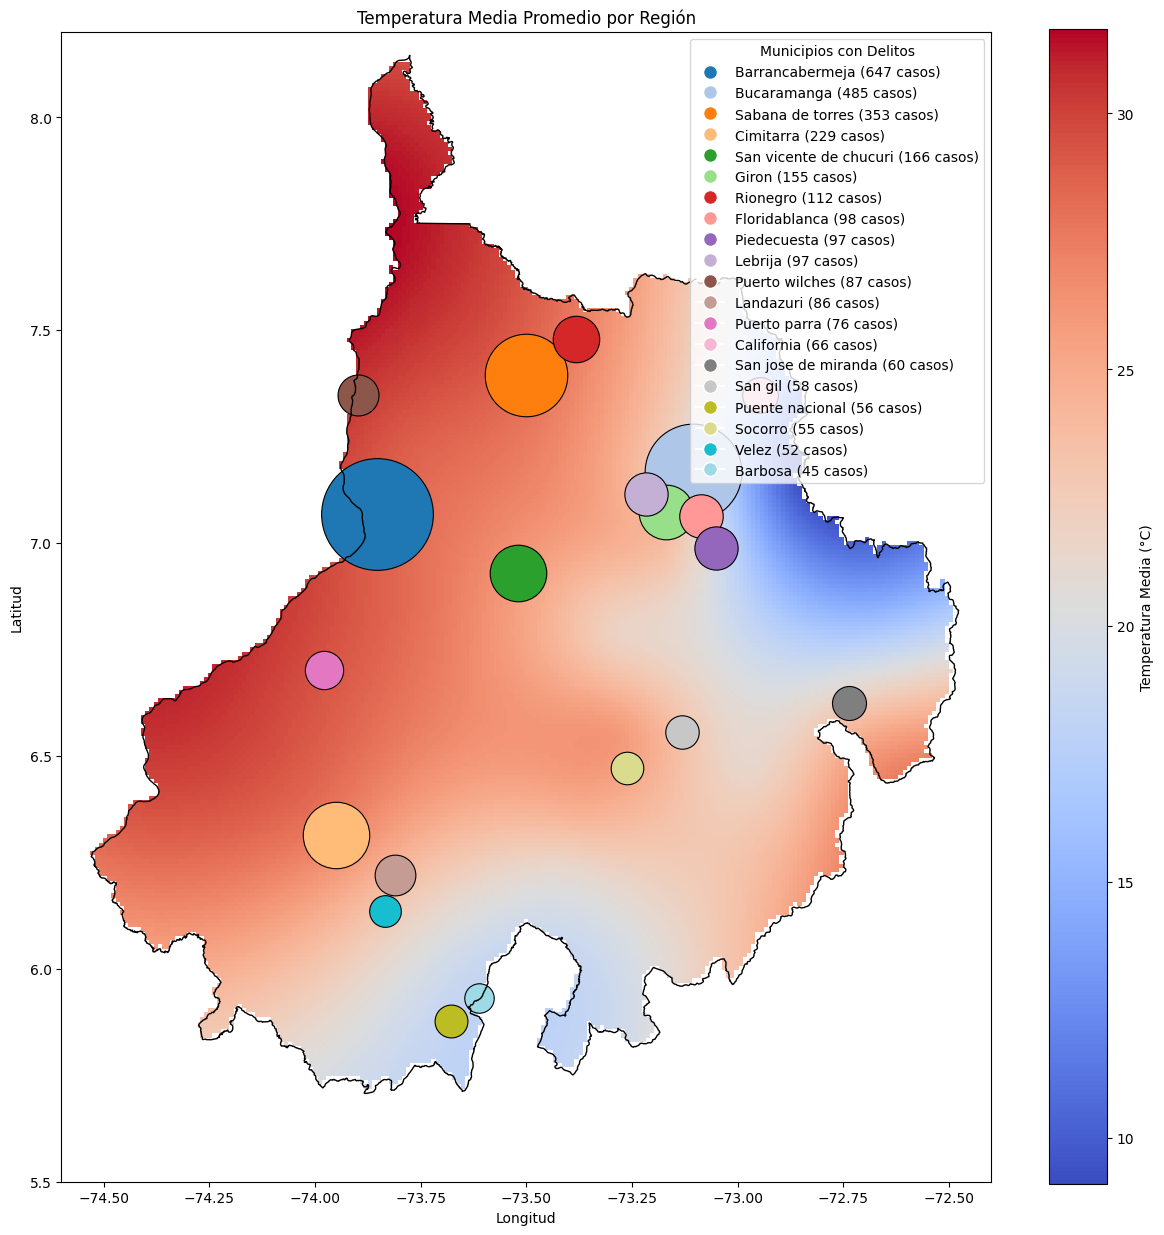

In [15]:
# Ruta de los archivos .npy
npy_folder_path = '../data/tmean_interp_final/npy/*.npy'
npy_files = glob.glob(npy_folder_path)

# Inicializar una matriz acumuladora para la suma de todas las matrices de 700x300
sum_matrix = None

# Cargar y sumar todas las matrices npy
for file in npy_files:
    data = np.load(file)
    if sum_matrix is None:
        sum_matrix = data
    else:
        sum_matrix += data

# Calcular la media dividiendo la suma por el número de archivos
mean_temperature_matrix = sum_matrix / len(npy_files)


# Cargar el archivo de límites administrativos de Colombia con Geopandas
colombia_shapefile = '../data/aoi/Departamento.shp'  # Archivo SHP o GeoJSON con límites de municipios
gdf = gpd.read_file(colombia_shapefile)

# Reproyectar los datos geográficos a WGS84 (EPSG:4326)
if gdf.crs != "EPSG:4326":
    gdf = gdf.to_crs("EPSG:4326")

# Filtrar para mostrar solo el departamento de Santander
santander_gdf = gdf[gdf['DeNombre'] == 'Santander']  # Asegúrate de que coincida con el nombre en el archivo

# Definir la región de límites (longitud mínima, longitud máxima, latitud mínima, latitud máxima)
region = (-74.6, -72.4, 5.5, 8.2)

# Crear el mapa de temperatura promedio
plt.figure(figsize=(15, 15))
extent = [region[0], region[1], region[2], region[3]]
mask = np.load("../data/mask.npy")
plt.imshow(mean_temperature_matrix * mask, extent=extent, origin='lower', cmap='coolwarm', aspect='auto')
plt.colorbar(label='Temperatura Media (°C)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Temperatura Media Promedio por Región')

# Graficar los límites de Santander
santander_gdf.boundary.plot(ax=plt.gca(), linewidth=1, edgecolor="black", label="Límites de Santander")

# Generar una paleta de colores para cada municipio
unique_municipios = top_20_delitos['Municipio'].unique()
colors = cm.get_cmap('tab20', len(unique_municipios))  # Elegir un colormap con suficientes colores

# Asignar un color único a cada municipio y crear la leyenda
legend_elements = []
for i, municipio in enumerate(unique_municipios):
    municipio_data = top_20_delitos[top_20_delitos['Municipio'] == municipio]
    plt.scatter(
        municipio_data['Longitud'], municipio_data['Latitud'],
        color=colors(i), edgecolors='black', linewidth=0.8, s=municipio_data['casos'] * 10, label=municipio
    )
    
    # Añadir el municipio a la leyenda personalizada
    legend_elements.append(
        Line2D([0], [0], marker='o', color='w', label=f"{municipio} ({int(municipio_data['casos'].values[0])} casos)",
               markerfacecolor=colors(i), markersize=10)
    )

# Añadir la leyenda con colores únicos por municipio
plt.legend(handles=legend_elements, loc='upper right', title="Municipios con Delitos")

# Guardar el plot
plt.savefig('../data/delitos/delitos_temp_santander.png', bbox_inches='tight', dpi=400)
plt.show()

In [ ]:
np.save('../data/delitos/temperatura_mean.npy',mean_temperature_matrix)

C:\Users\LUISRODRIGUEZ\AppData\Local\Temp\ipykernel_12652\3026472169.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', len(unique_municipios))  # Elegir un colormap con suficientes colores


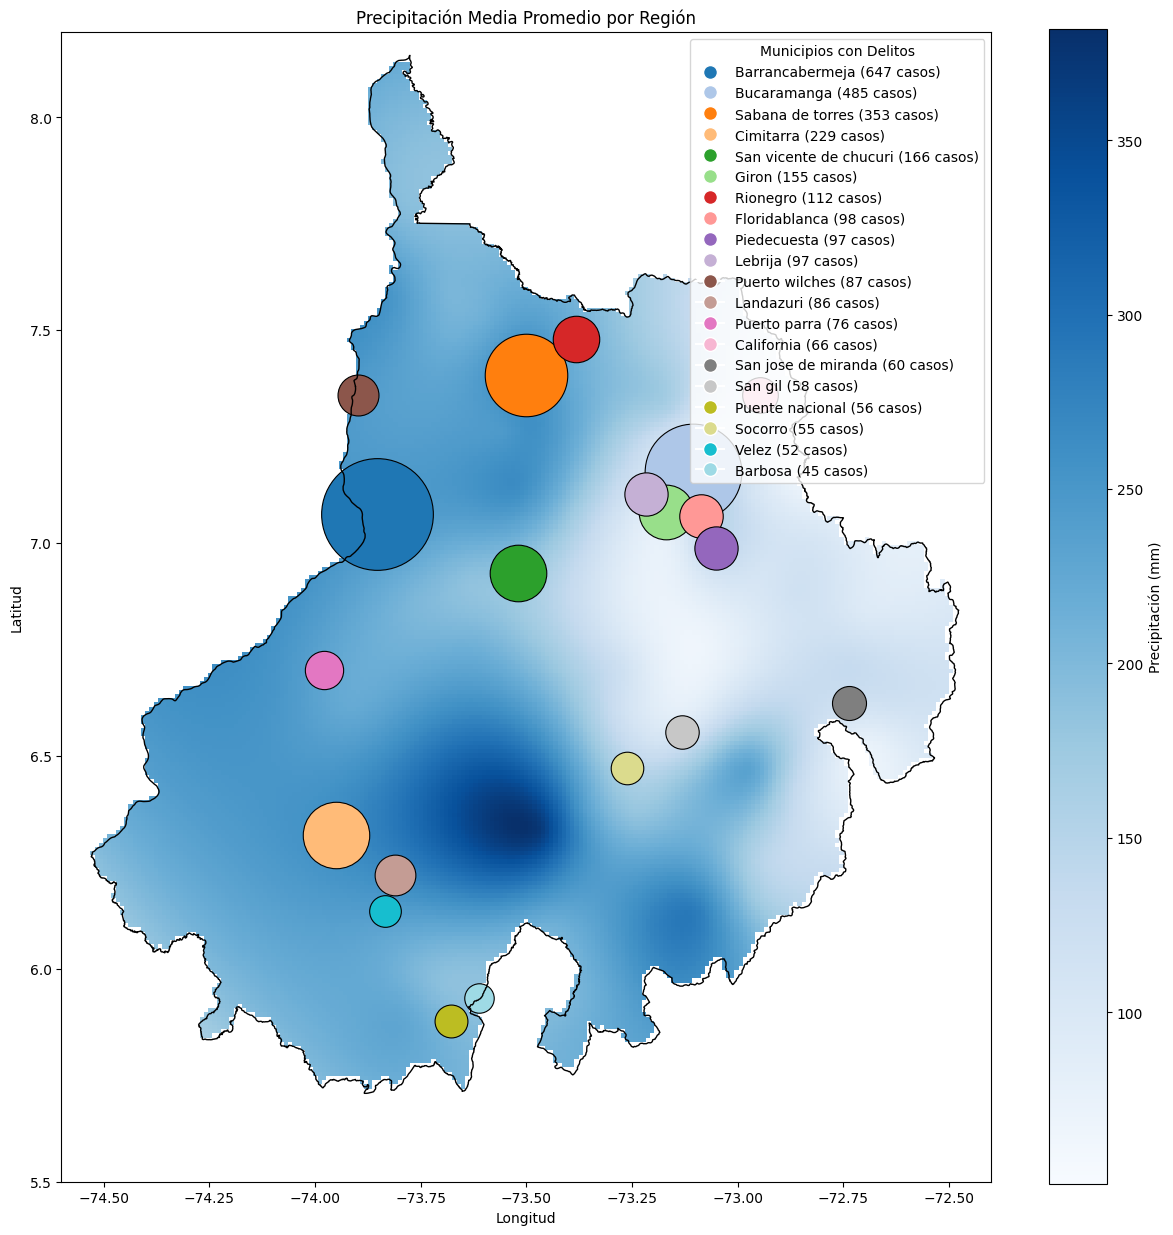

In [17]:
# Ruta de los archivos .npy
npy_folder_path = '../data/precipitacion_interp_final/npy/*.npy'
npy_files = glob.glob(npy_folder_path)

# Inicializar una matriz acumuladora para la suma de todas las matrices de 700x300
sum_matrix = None

# Cargar y sumar todas las matrices npy
for file in npy_files:
    data = np.load(file)
    if sum_matrix is None:
        sum_matrix = data
    else:
        sum_matrix += data

# Calcular la media dividiendo la suma por el número de archivos
mean_precipitacion_matrix = sum_matrix / len(npy_files)

# Crear el mapa de temperatura promedio
plt.figure(figsize=(15, 15))
extent = [region[0], region[1], region[2], region[3]]
mask = np.load("../data/mask.npy")
plt.imshow(mean_precipitacion_matrix * mask, extent=extent, origin='lower', cmap='Blues', aspect='auto')
plt.colorbar(label='Precipitación (mm)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Precipitación Media Promedio por Región')

# Graficar los límites de Santander
santander_gdf.boundary.plot(ax=plt.gca(), linewidth=1, edgecolor="black", label="Límites de Santander")

# Generar una paleta de colores para cada municipio
unique_municipios = top_20_delitos['Municipio'].unique()
colors = cm.get_cmap('tab20', len(unique_municipios))  # Elegir un colormap con suficientes colores

# Asignar un color único a cada municipio y crear la leyenda
legend_elements = []
for i, municipio in enumerate(unique_municipios):
    municipio_data = top_20_delitos[top_20_delitos['Municipio'] == municipio]
    plt.scatter(
        municipio_data['Longitud'], municipio_data['Latitud'],
        color=colors(i), edgecolors='black', linewidth=0.8, s=municipio_data['casos'] * 10, label=municipio
    )
    
    # Añadir el municipio a la leyenda personalizada
    legend_elements.append(
        Line2D([0], [0], marker='o', color='w', label=f"{municipio} ({int(municipio_data['casos'].values[0])} casos)",
               markerfacecolor=colors(i), markersize=10)
    )

# Añadir la leyenda con colores únicos por municipio
plt.legend(handles=legend_elements, loc='upper right', title="Municipios con Delitos")

plt.savefig('../data/delitos/delitos_prec_santander.png', bbox_inches='tight',dpi=400)
plt.show()

In [ ]:
np.save('../data/delitos/precipitacion_mean.npy',mean_precipitacion_matrix)

C:\Users\LUISRODRIGUEZ\AppData\Local\Temp\ipykernel_12980\761654313.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', len(unique_municipios))  # Elegir un colormap con suficientes colores


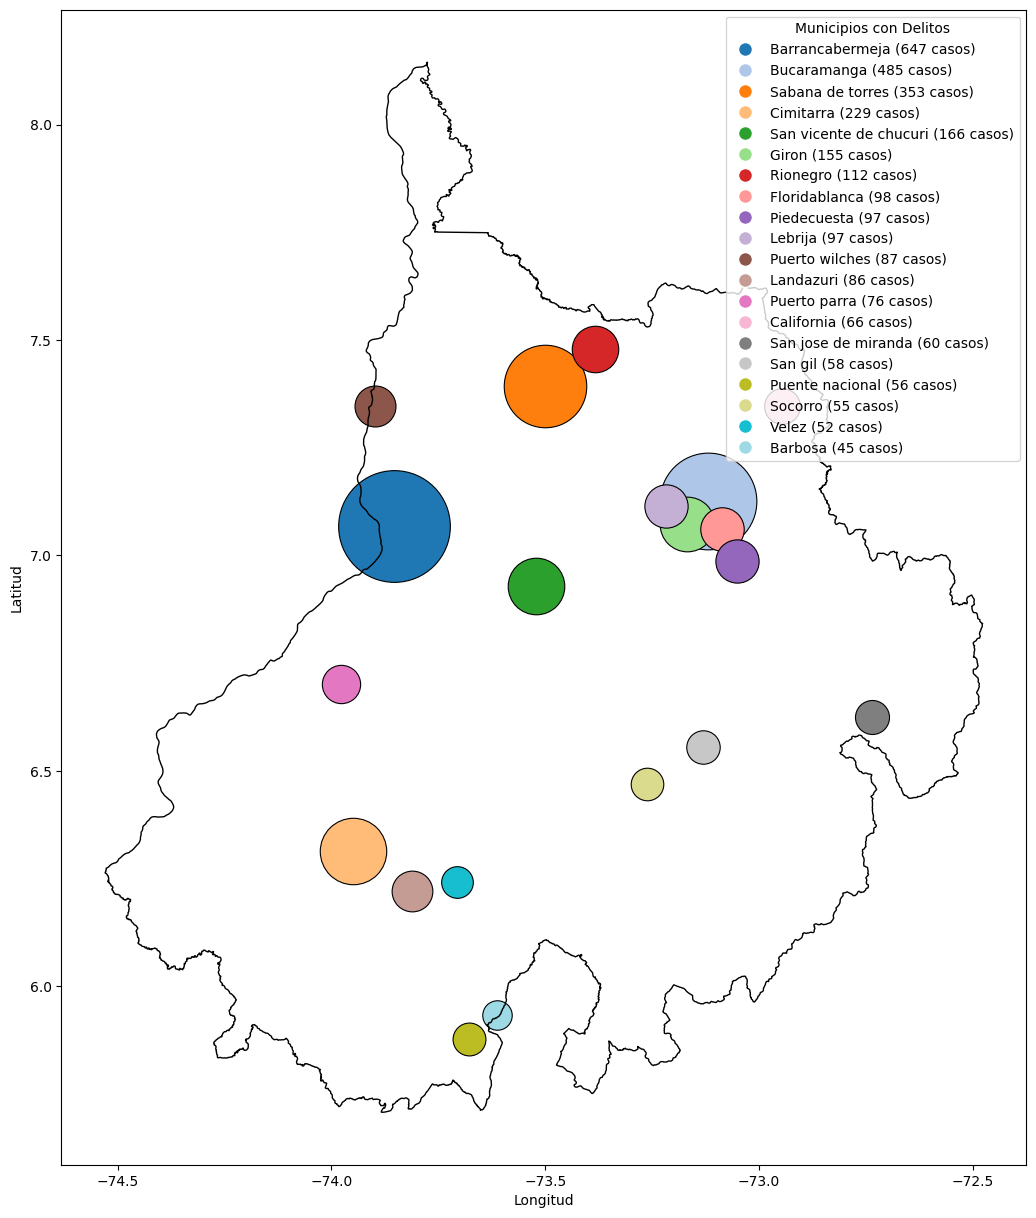

In [70]:
# Crear el mapa de temperatura promedio
plt.figure(figsize=(15, 15))
extent = [region[0], region[1], region[2], region[3]]
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Graficar los límites de Santander
santander_gdf.boundary.plot(ax=plt.gca(), linewidth=1, edgecolor="black", label="Límites de Santander")

# Generar una paleta de colores para cada municipio
unique_municipios = top_20_delitos['Municipio'].unique()
colors = cm.get_cmap('tab20', len(unique_municipios))  # Elegir un colormap con suficientes colores

# Asignar un color único a cada municipio y crear la leyenda
legend_elements = []
for i, municipio in enumerate(unique_municipios):
    municipio_data = top_20_delitos[top_20_delitos['Municipio'] == municipio]
    plt.scatter(
        municipio_data['Longitud'], municipio_data['Latitud'],
        color=colors(i), edgecolors='black', linewidth=0.8, s=municipio_data['casos'] * 10, label=municipio
    )
    
    # Añadir el municipio a la leyenda personalizada
    legend_elements.append(
        Line2D([0], [0], marker='o', color='w', label=f"{municipio} ({int(municipio_data['casos'].values[0])} casos)",
               markerfacecolor=colors(i), markersize=10)
    )

# Añadir la leyenda con colores únicos por municipio
plt.legend(handles=legend_elements, loc='upper right', title="Municipios con Delitos")

plt.savefig('../data/delitos/delitos_santander.png', bbox_inches='tight',dpi=400)
plt.show()

In [79]:
import plotly.express as px

# Crear el scatter map
fig = px.scatter_mapbox(
    merged_df1,
    lat="Latitud",
    lon="Longitud",
    size="casos",  # El tamaño de los puntos reflejará el número de casos
    color="casos",  # Color para visualizar la cantidad de casos
    hover_name="Municipio",  # Mostrar el nombre del municipio al pasar el ratón
    hover_data={"casos": True, "Latitud": False, "Longitud": False},  # Mostrar solo el número de casos en el hover
    zoom=5,  # Ajustar el nivel de zoom al área de interés
    title="Casos de Delitos por Municipio en Santander",
    size_max= 30
)

# Configurar el estilo del mapa
fig.update_layout(
    mapbox_style="carto-positron",  # Estilo de mapa base
    mapbox_zoom=7,  # Nivel de zoom inicial
    mapbox_center={"lat": merged_df['Latitud'].mean(), "lon": merged_df['Longitud'].mean()},
    title_x=0.5  # Centrar el título
)

fig.show()